## Juliaでの確率分布の扱い(Distributions.jl)

In [1]:
using Distributions

In [2]:
using PyPlot
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

## 離散型確率分布

### ベルヌーイ分布

In [152]:
# 分布を作る
d = Bernoulli(0.3)

Bernoulli{Float64}(p=0.3)

In [153]:
x = rand(d)
x

false

In [154]:
println(x)
println(Int(x))

false
0


In [155]:
# 10個の独立なサンプルを得る
X = rand(d, 10)
X'

1×10 adjoint(::Vector{Bool}) with eltype Bool:
 0  1  0  0  0  1  0  0  0  0

In [156]:
# 1が生成される確率
println(pdf(d, 1))

# 0が生成される確率
println(pdf(d, 0))

# -1が生成される確率m（起こり得ないのでゼロになる）
println(pdf(d, -1))

0.3
0.7
0.0


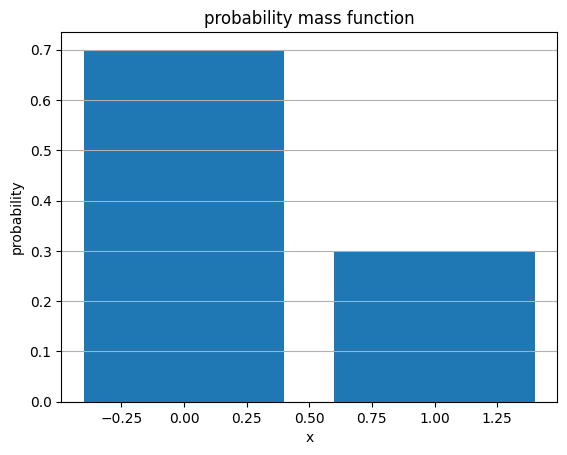

false

In [158]:
fig, ax = subplots()
ax.bar([0, 1], pdf.(d, [0, 1]))
set_options(ax, "x", "probability", "probability mass function";
            gridy=true)

In [11]:
println("mean = $(mean(d)), std = $(std(d))")

mean = 0.3, std = 0.458257569495584


In [12]:
μ = 0.3
println("std = $(sqrt(μ*(1-μ)))")

std = 0.458257569495584


In [13]:
X = rand(d, 10000)
println("mean ≈ $(mean(X)), std ≈ $(std(X))")

mean ≈ 0.3017, std ≈ 0.45901871401717487


### 二項分布

In [14]:
d = Binomial(20, 0.3)

Binomial{Float64}(n=20, p=0.3)

In [15]:
x = rand(d)

7

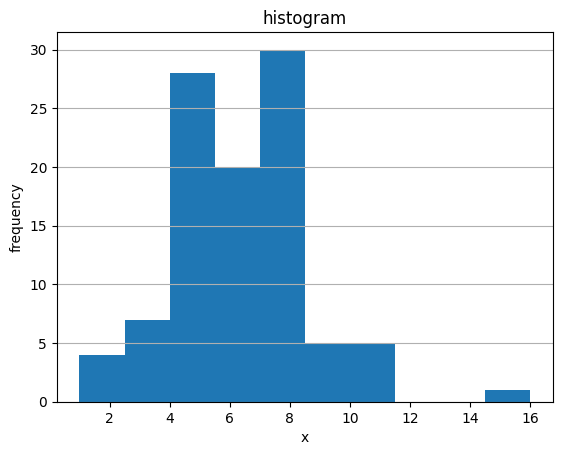

false

In [16]:
X = rand(d, 100)
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram"; gridy=true)

In [17]:
println("mean (exact) = $(mean(d)), mean (approx) = $(mean(X))")

mean (exact) = 6.0, mean (approx) = 6.02


In [18]:
println("std (exact) = $(std(d)), std (approx) = $(std(X))")

std (exact) = 2.0493901531919194, std (approx) = 2.287338888734941


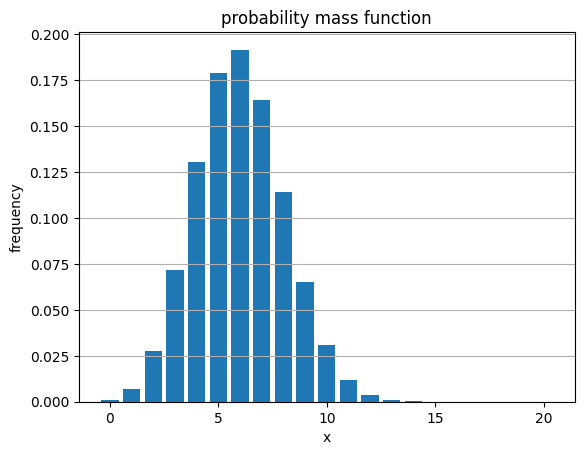

false

In [22]:
xs = range(0, 20, length=21)
fig, ax = subplots()
ax.bar(xs, pdf.(d, xs))
set_options(ax, "x", "frequency", "probability mass function"; gridy=true)

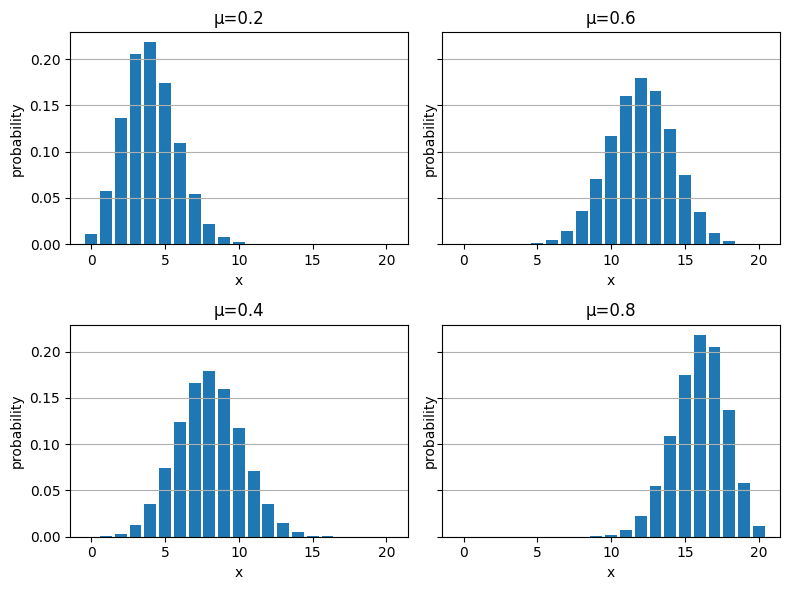

In [24]:
# 平均パラメータのリスト
μs = [0.2, 0.4, 0.6, 0.8]

fig, axes = subplots(2, 2, sharey=true, figsize=(8, 6))
for (i, ax) in enumerate(axes)
    μ = μs[i]
    d = Binomial(20, μ)
    ax.bar(xs, pdf.(d, xs))
    set_options(ax, "x", "probability", "μ=$(μ)"; gridy=true)
end
tight_layout()

### 多項分布

In [25]:
M = 10
d = Multinomial(M, [0.5, 0.3, 0.2])

Multinomial{Float64, Vector{Float64}}(n=10, p=[0.5, 0.3, 0.2])

In [26]:
x = rand(d)
x

3-element Vector{Int64}:
 6
 3
 1

In [27]:
X = rand(d, 100)
X

3×100 Matrix{Int64}:
 1  6  5  4  6  6  5  3  3  5  3  4  7  …  6  5  5  3  7  6  3  5  5  6  5  5
 5  3  4  4  3  4  3  4  5  1  5  1  0     2  2  4  3  2  3  4  2  3  1  3  1
 4  1  1  2  1  0  2  3  2  4  2  5  3     2  3  1  4  1  1  3  3  2  3  2  4

In [28]:
mean(X, dims=2)

3×1 Matrix{Float64}:
 5.14
 2.82
 2.04

In [29]:
mean(d)

3-element Vector{Float64}:
 5.0
 3.0
 2.0

In [30]:
cov(X, dims=2)

3×3 Matrix{Float64}:
  2.50545   -1.52      -0.985455
 -1.52       2.14909   -0.629091
 -0.985455  -0.629091   1.61455

In [31]:
cov(d)

3×3 Matrix{Float64}:
  2.5  -1.5  -1.0
 -1.5   2.1  -0.6
 -1.0  -0.6   1.6

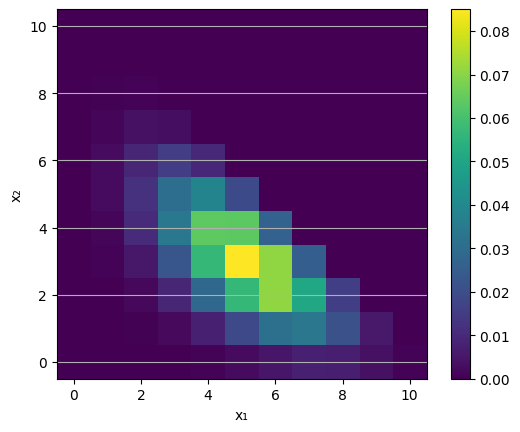

false

In [32]:
# 各次元の値のとる範囲
xs = 0:M

fig, ax = subplots()
cs = ax.imshow([pdf(d, [x₁, x₂, M - (x₁ + x₂)]) for x₁ in xs, x₂ in xs]', origin="lower")
fig.colorbar(cs)
set_options(ax, "x₁", "x₂", ""; gridy=true)

### ポアソン分布

In [34]:
μ = 2.0
d = Poisson(μ)
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Int64}) with eltype Int64:
 2  2  1  4  3  2  0  3  1  6  2  1  4  …  5  2  3  4  1  0  4  3  1  1  5  1

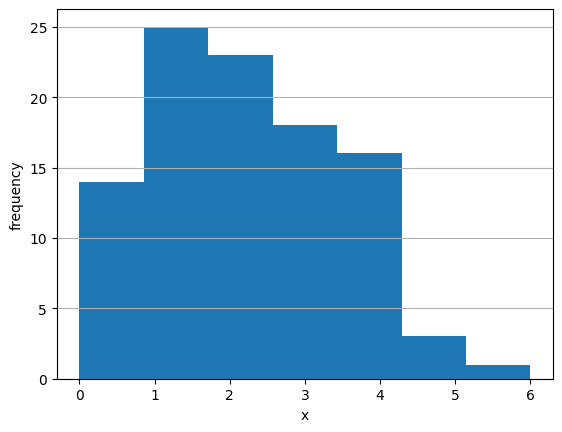

false

In [35]:
max_val = maximum(X)
fig, ax = subplots()
ax.hist(X, bins=max_val+1, range=[0, max_val])
set_options(ax, "x", "frequency", ""; gridy=true)

In [36]:
println("mean (exact) = $(mean(d)), var (exact) = $(var(d))")

mean (exact) = 2.0, var (exact) = 2.0


In [37]:
println("mean (aprrox) = $(mean(X)), var (approx) = $(var(X))")

mean (aprrox) = 2.1, var (approx) = 2.070707070707071


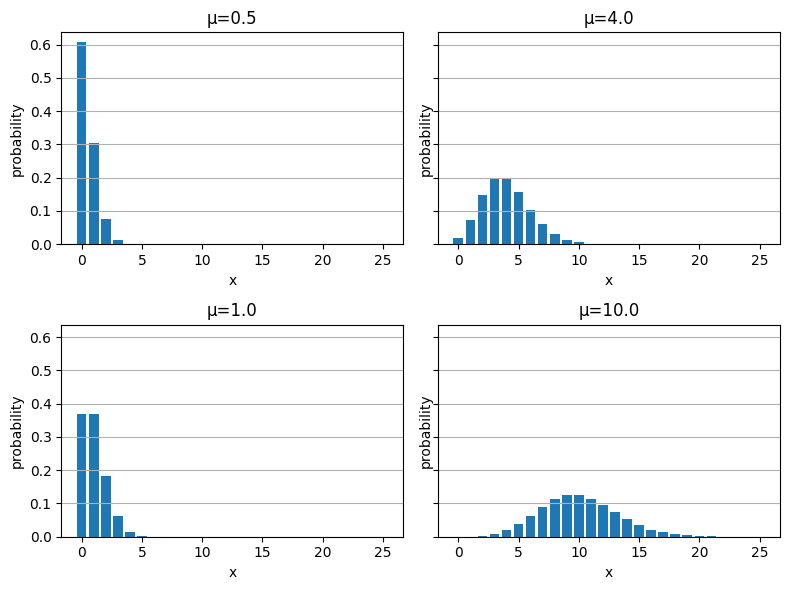

In [39]:
# 表示範囲は0から25までとする
xs = 0:25

# 平均パラメータのリスト
μs = [0.5, 1.0, 4.0, 10.0]

fig, axes = subplots(2, 2, sharey=true, figsize=(8, 6))
for (i, ax) in enumerate(axes)
    μ = μs[i]
    d = Poisson(μ)
    ax.bar(xs, pdf.(d, xs))
    set_options(ax, "x", "probability", "μ=$(μ)"; gridy=true)
end
tight_layout()

### 負の二項分布

In [40]:
# 負の二項分布の作成
r = 10
μ = 0.3
d = NegativeBinomial(r, μ)

# 値をサンプリング
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Int64}) with eltype Int64:
 22  26  14  17  26  18  14  19  21  25  …  13  34  22  24  24  9  33  10  20

In [41]:
println("mean (exact) = $(mean(d)), var (exact) = $(var(d))")

mean (exact) = 23.333333333333336, var (exact) = 77.77777777777779


In [42]:
println("mean (approx) = $(mean(X)), var (approx) = $(var(X))")

mean (approx) = 22.51, var (approx) = 69.96959595959598


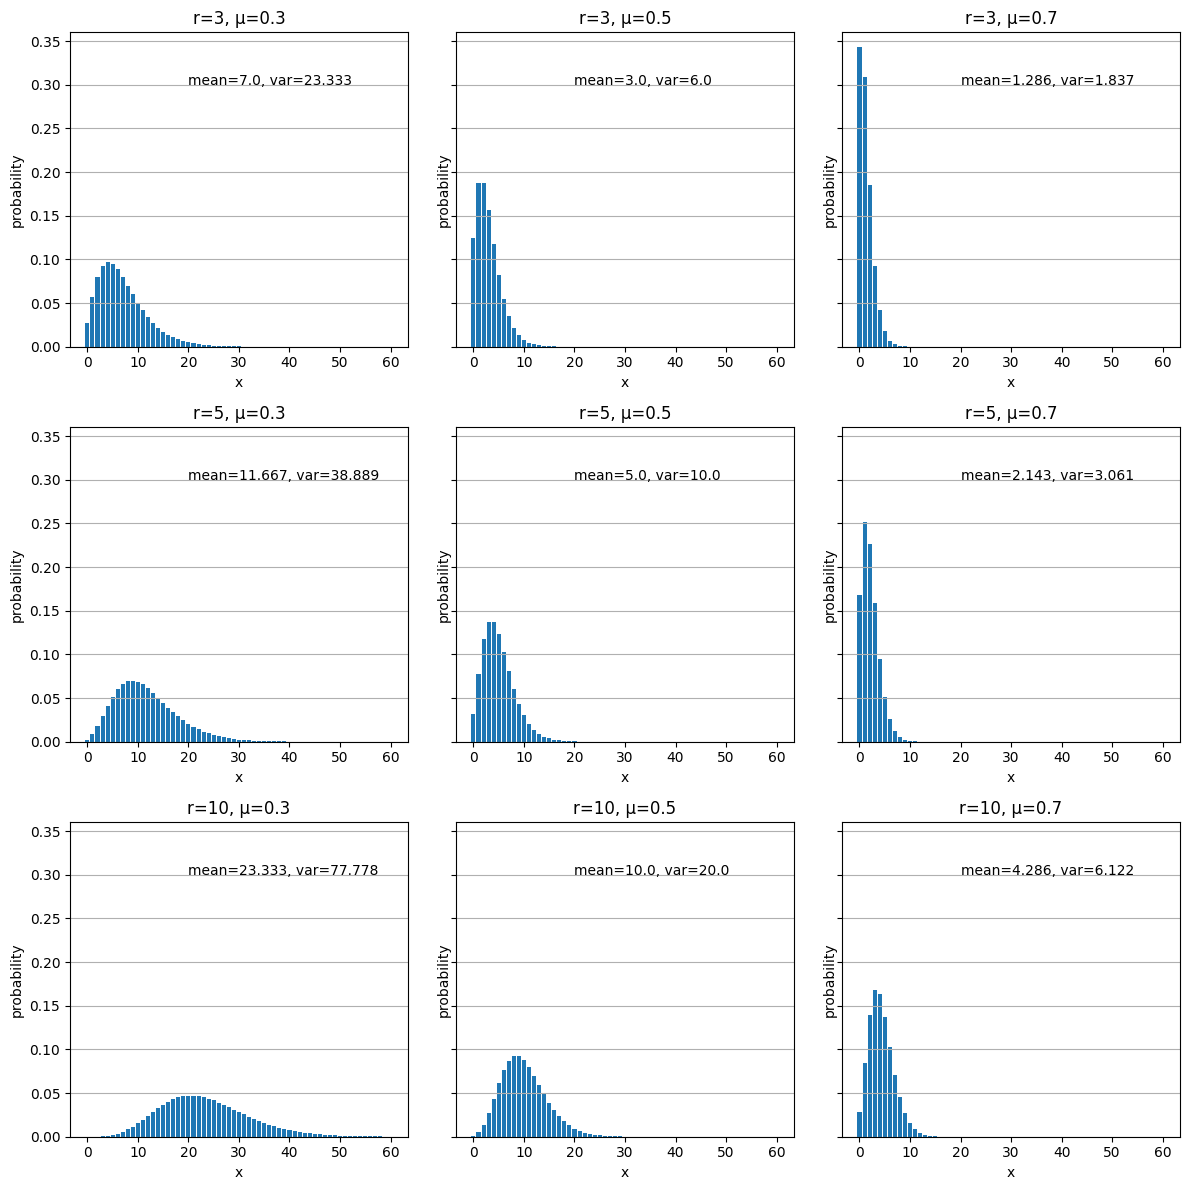

In [43]:
# 表示範囲は０から６０までとする
xs = 0:60

# パラメータのリスト
rs = [3, 5, 10]
μs = [0.3, 0.5, 0.7]

fig, axes = subplots(3, 3, sharey=true, figsize=(12, 12))
for (i, r) in enumerate(rs)
    for (j, μ) in enumerate(μs)
        d = NegativeBinomial(r, μ)
        axes[i, j].bar(xs, pdf.(d, xs))
        
        # 平均と分散の計算．表示は少数３桁に丸める
        m = round(mean(d), digits=3)
        v = round(var(d), digits=3)
        
        axes[i, j].text(20, 0.3, "mean=$(m), var=$(v)")
        set_options(axes[i, j], "x", "probability", "r=$(r), μ=$(μ)"; gridy=true)
    end
end
tight_layout()

## 連続型確率分布

### 一様分布

In [44]:
# パラメータ
a = 0
b = 1

# 一様分布の作成
d = Uniform(a, b)

# サンプリング
X = rand(d, 10000)
X'

1×10000 adjoint(::Vector{Float64}) with eltype Float64:
 0.434308  0.0248262  0.611248  0.468234  …  0.928743  0.915467  0.621277

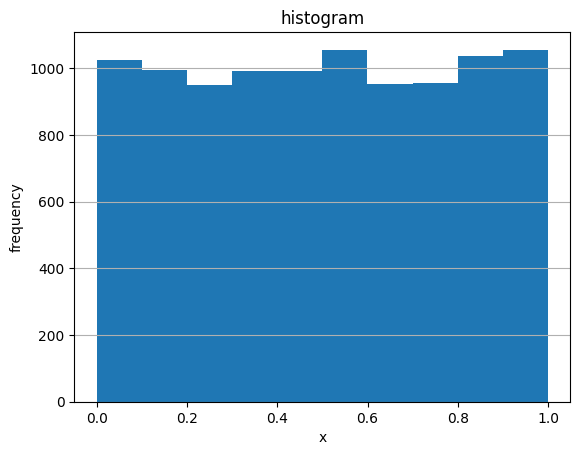

false

In [45]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram"; gridy=true)

### 正規分布

In [46]:
# 平均パラメータ
μ = 0.0

# 標準偏差パラメータ
σ = 1.0

# 正規分布の作成
d = Normal(μ, σ)

# サンプリング
X = rand(d, 10000)
X'

1×10000 adjoint(::Vector{Float64}) with eltype Float64:
 -1.31737  0.0203842  0.455073  -0.374781  …  0.104153  0.755677  -0.778719

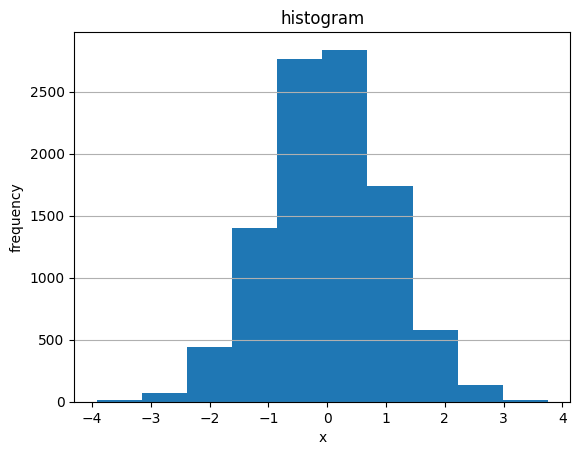

false

In [47]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram"; gridy=true)

In [48]:
println("mean (exact) = $(mean(d)), std (exact) = $(std(d))")
println("mean (approx) = $(mean(X)), std (approx) = $(std(X))")

mean (exact) = 0.0, std (exact) = 1.0
mean (approx) = 0.0012119845314249747, std (approx) = 0.9997916480891039


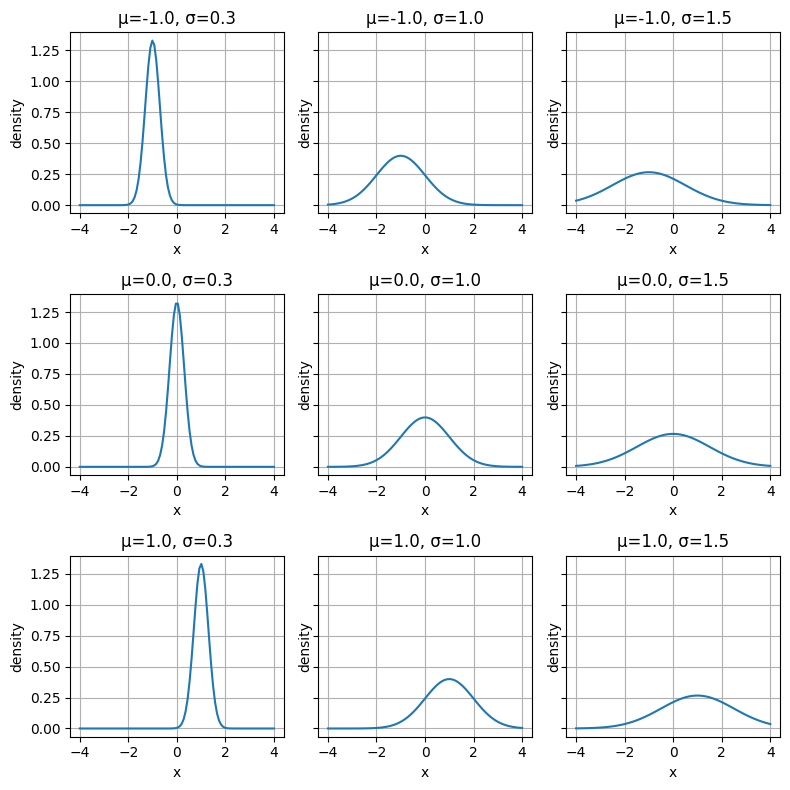

In [49]:
# 表示の範囲は−４から４までとする
xs = range(-4, 4, length=100)

# 平均パラメータのリスト
μs = [-1.0, 0.0, 1.0]

# 標準偏差パラメータのリスト
σs = [0.3, 1.0, 1.5]

fig, axes = subplots(length(μs), length(σs), sharey=true, figsize=(8, 8))
for (i, μ) in enumerate(μs)
    for (j, σ) in enumerate(σs)
        d = Normal(μ, σ)
        axes[i, j].plot(xs, pdf.(d, xs))
        set_options(axes[i, j], "x", "density", "μ=$(μ), σ=$(σ)")
    end
end
tight_layout()

In [50]:
μ = 0.0
σ = 0.2
d = Normal(μ, σ)
pdf(d, 0.1)

1.7603266338214976

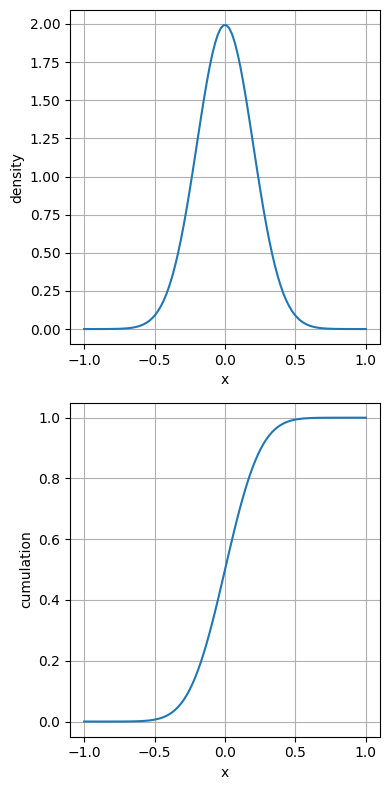

In [51]:
xs = range(-1, 1, length=100)
fig, axes = subplots(2, 1, figsize=(4, 8))

# 正規分布の確率密度関数をプロット
axes[1].plot(xs, pdf.(d, xs))
set_options(axes[1], "x", "density", "")
# 累積分布関数をプロット
axes[2].plot(xs, cdf.(d, xs))
set_options(axes[2], "x", "cumulation", "")

tight_layout()

In [52]:
cdf(d, 0.2) - cdf(d, 0.0)

0.34134474606854304

In [53]:
X = rand(d, 10000)

# ０．０から０．２に入ったサンプルの割合を求める
mean(0.0 .< X .< 0.2)

0.3403

In [54]:
μ = 0.0
σ = 1.0
d = Normal(μ, σ)

Normal{Float64}(μ=0.0, σ=1.0)

In [55]:
X_obs = [0.1, -0.1, 0.2, 0.5]
pdf.(d, X_obs)

4-element Vector{Float64}:
 0.3969525474770118
 0.3969525474770118
 0.3910426939754559
 0.3520653267642995

In [57]:
prod(pdf.(d, X_obs))

0.021693249867975634

In [58]:
lp = sum(logpdf.(d, X_obs))
println("logpdf = $(lp)")

# 元のpdfに戻す
println("pdf = $(exp(lp))")

logpdf = -3.830754132818691
pdf = 0.021693249867975627


### 多変量正規分布

In [59]:
μ = [0.0, 0.0]
Σ = [1.0 0.0;
     0.0 1.0]
d = MvNormal(μ, Σ)
X = rand(d, 1000)
X

2×1000 Matrix{Float64}:
 1.05814   -1.09511   0.580217  -1.28525   …  -0.259853   1.62252  0.704443
 0.439031   0.655904  1.53294    0.982483      1.07025   -1.30341  0.298424

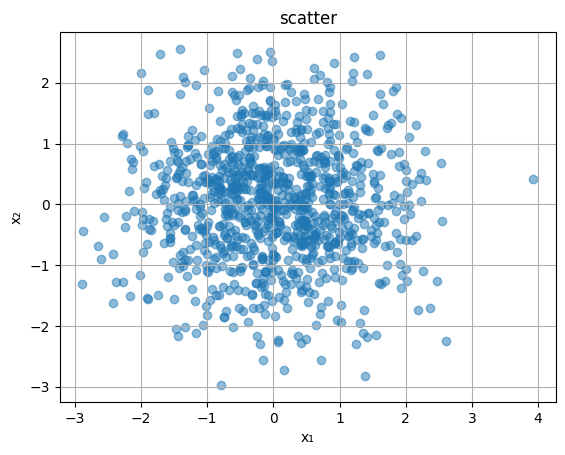

false

In [60]:
fig, ax = subplots()
ax.scatter(X[1, :], X[2, :], alpha=0.5)
set_options(ax, "x₁", "x₂", "scatter")

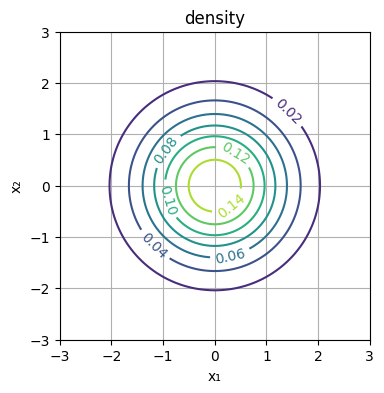

false

In [61]:
x₁s = range(-3, 3, length=100)
x₂s = range(-3, 3, length=100)

fig, ax = subplots(figsize=(4, 4))
cs = ax.contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
ax.clabel(cs, inline=true)
set_options(ax, "x₁", "x₂", "density")

In [75]:
μ = [0.0, 0.0]
Σ = [1.0 0.5;
     0.5 1.0]
d = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.0 0.5; 0.5 1.0]
)


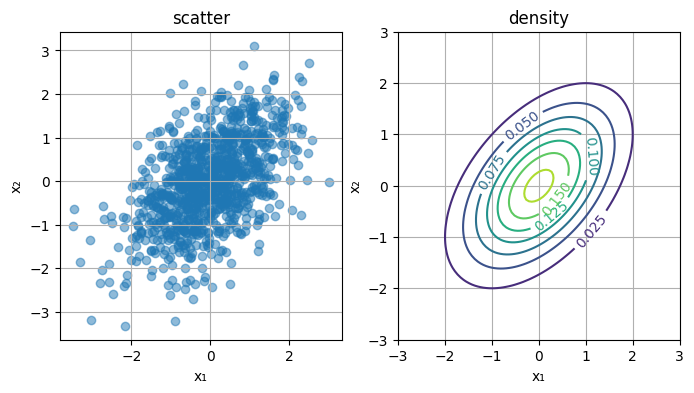

false

In [76]:
X = rand(d, 1000)
fig, axes = subplots(1, 2, figsize=(8, 4))
axes[1].scatter(X[1, :], X[2, :], alpha=0.5)
set_options(axes[1], "x₁", "x₂", "scatter")

x₁s = range(-3, 3, length=100)
x₂s = range(-3, 3, length=100)

cs = axes[2].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[2].clabel(cs, inline=true)
set_options(axes[2], "x₁", "x₂", "density")

In [77]:
μ = [0.0, 0.0]
Σ = [1.0 -0.5;
     -0.5 1.0]
d = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.0 -0.5; -0.5 1.0]
)


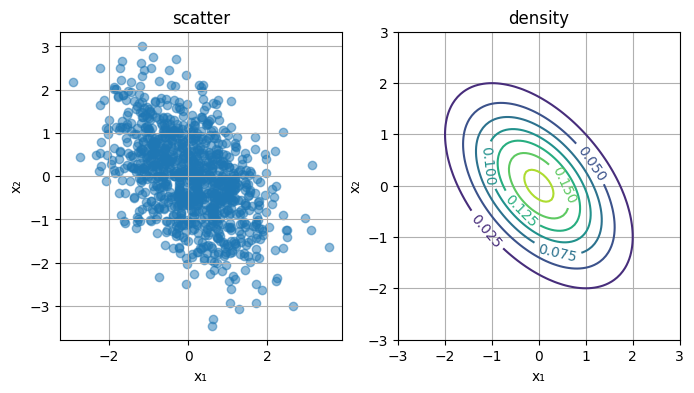

false

In [78]:
X = rand(d, 1000)
fig, axes = subplots(1, 2, figsize=(8, 4))
axes[1].scatter(X[1, :], X[2, :], alpha=0.5)
set_options(axes[1], "x₁", "x₂", "scatter")

x₁s = range(-3, 3, length=100)
x₂s = range(-3, 3, length=100)

cs = axes[2].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[2].clabel(cs, inline=true)
set_options(axes[2], "x₁", "x₂", "density")

In [79]:
μ = [0.0, 0.0]
Σ = [1.5 0.25;
     0.25 0.5]
d = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.5 0.25; 0.25 0.5]
)


In [80]:
function approx_integration(x_range, f)
    # 幅
    Δ = x_range[2] - x_range[1]
    
    # 近似された面積と幅を返す
    sum([f(x) * Δ for x in x_range]), Δ
end

approx_integration (generic function with 1 method)

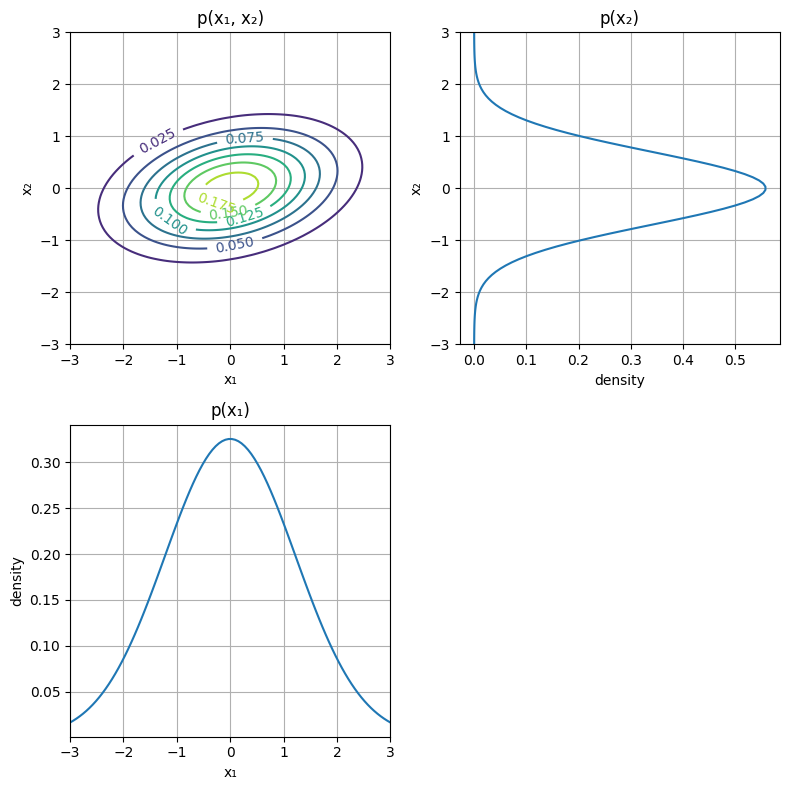

In [82]:
# 同時分布
fig, axes = subplots(2, 2, figsize=(8, 8))

cs = axes[1, 1].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[1, 1].clabel(cs, inline=true)
set_options(axes[1, 1], "x₁", "x₂", "p(x₁, x₂)")

# x₁の周辺分布
x_range = range(-3, 3, length=100)
p1_marginal(x₁) = approx_integration(x_range, x₂ -> pdf(d, [x₁, x₂]))[1]
axes[2, 1].plot(x₁s, p1_marginal.(x₁s))
axes[2, 1].set_xlim([minimum(x₁s), maximum(x₁s)])
set_options(axes[2, 1], "x₁", "density", "p(x₁)")

# x₂の周辺分布
x_range = range(-3, 3, length=100)
p2_marginal(x₂) = approx_integration(x_range, x₁ -> pdf(d, [x₁, x₂]))[1]
axes[1, 2].plot(p2_marginal.(x₂s), x₂s)
axes[1, 2].set_ylim([minimum(x₂s), maximum(x₂s)])
set_options(axes[1, 2], "density", "x₂", "p(x₂)")

axes[2, 2].axis("off")

tight_layout()

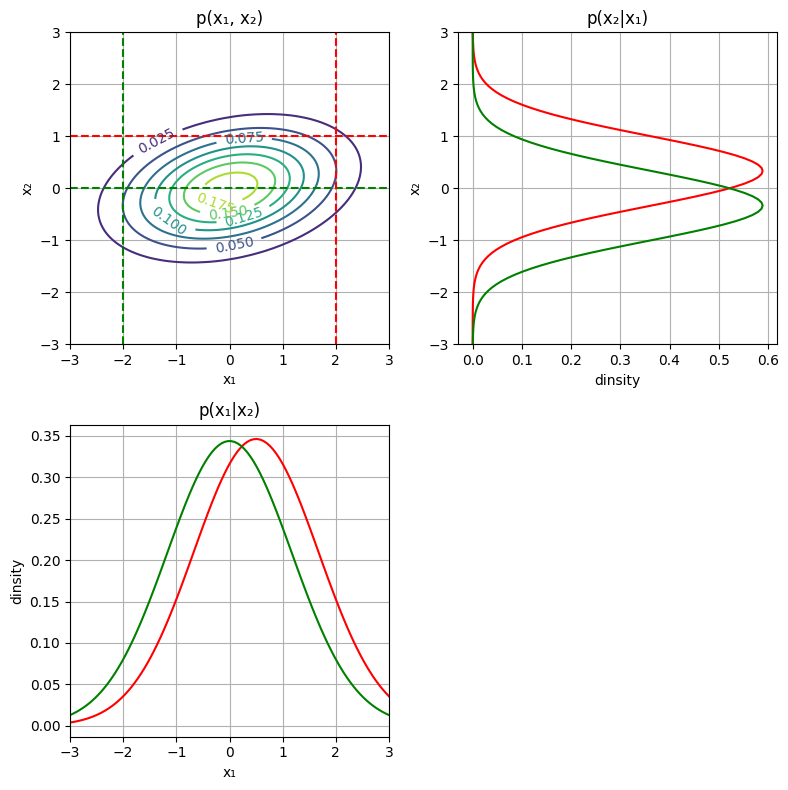

In [87]:
# 同時分布
fig, axes = subplots(2, 2, figsize=(8, 8))

cs = axes[1, 1].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[1, 1].clabel(cs, inline=true)
set_options(axes[1, 1], "x₁", "x₂", "p(x₁, x₂)")

# x₁の条件付き分布 p(x₁|x₂)
x₂ = 1.0
p1_conditional(x₁) = pdf(d, [x₁, x₂]) / p2_marginal(x₂)
axes[1, 1].plot([minimum(x₁s), maximum(x₁s)], [x₂, x₂], "r--")
axes[2, 1].plot(x₁s, p1_conditional.(x₁s), "r", label="p(x₁|x₂=$(x₂))")

x₂ = 0.0
p1_conditional(x₁) = pdf(d, [x₁, x₂]) / p2_marginal(x₂)
axes[1, 1].plot([minimum(x₁s), maximum(x₁s)], [x₂, x₂], "g--")
axes[2, 1].plot(x₁s, p1_conditional.(x₁s), "g", label="p(x₁|x₂=$(x₂))")

axes[2, 1].set_xlim([minimum(x₁s), maximum(x₁s)])
set_options(axes[2, 1], "x₁", "dinsity", "p(x₁|x₂)")

# x₂の条件付き分布 p(x₂|x₁)
x₁ = 2.0
p2_conditional(x₂) = pdf(d, [x₁, x₂]) / p1_marginal(x₁)
axes[1, 1].plot([x₁, x₁], [minimum(x₂s), maximum(x₂s)], "r--")
axes[1, 2].plot(p2_conditional.(x₂s), x₂s, "r", label="p(x₂|x₁=$(x₁))")

x₁ = -2.0
p2_conditional(x₂) = pdf(d, [x₁, x₂]) / p1_marginal(x₁)
axes[1, 1].plot([x₁, x₁], [minimum(x₂s), maximum(x₂s)], "g--")
axes[1, 2].plot(p2_conditional.(x₂s), x₂s, "g", label="p(x₂|x₁=$(x₁))")

axes[1, 2].set_ylim([minimum(x₂s), maximum(x₂s)])
set_options(axes[1, 2], "dinsity", "x₂", "p(x₂|x₁)")

axes[2, 2].axis("off")

tight_layout()

### ガンマ分布

In [89]:
# ガンマ分布を作成
α = 1.5
θ = 2.5
d = Gamma(α, θ)

# サンプルの生成
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 8.94508  13.7854  3.70521  9.08199  …  5.47675  1.57566  1.2141  1.08849

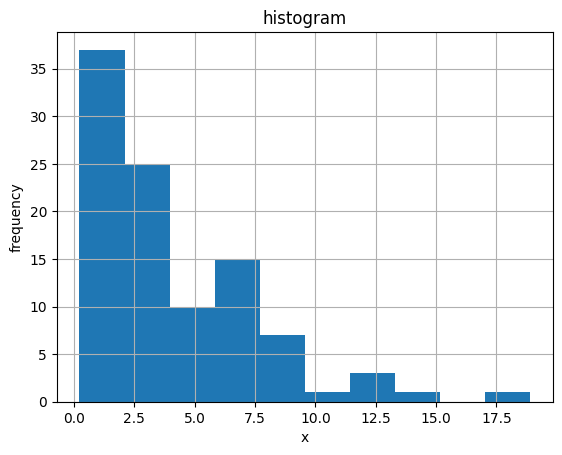

false

In [90]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram")

In [92]:
println("mean (exact) : $(mean(d)), $(α*θ)")
println("var (exact) : $(var(d)), $(α*θ^2)")

mean (exact) : 3.75, 3.75
var (exact) : 9.375, 9.375


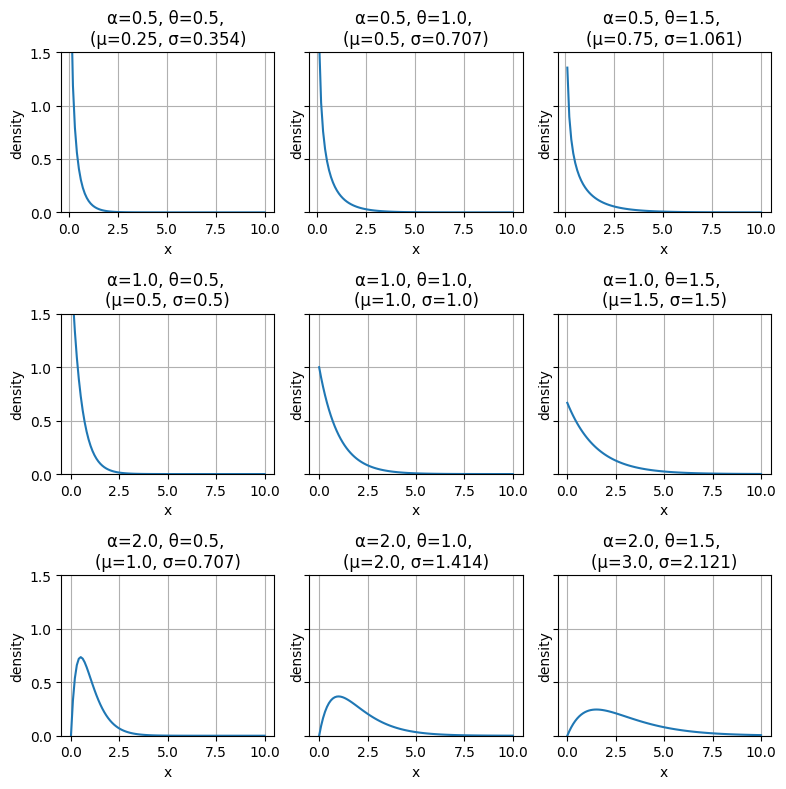

In [97]:
xs = range(0, 10, length=100)
αs = [0.5, 1.0, 2.0]
θs = [0.5, 1.0, 1.5]
fig, axes = subplots(length(αs), length(θs), sharey=true, figsize=(8, 8))
for (i, α) in enumerate(αs)
    for (j, θ) in enumerate(θs)
        d = Gamma(α, θ)
        μ, σ = mean(d), std(d)
        axes[i, j].plot(xs, pdf.(d, xs))
        axes[i, j].set_ylim([0, 1.5])
        set_options(axes[i, j], "x", "density", "α=$(α), θ=$(θ), \n" * "(μ=$(round(μ, digits=3)), σ=$(round(σ, digits=3)))")
    end
end
tight_layout()

### ベータ分布

In [94]:
# ベータ分布の作成
α = 0.5
β = 0.5
d = Beta(α, β)

# サンプルの生成
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 0.734269  0.710273  0.000514279  0.0536533  …  0.00940868  0.51537  0.864429

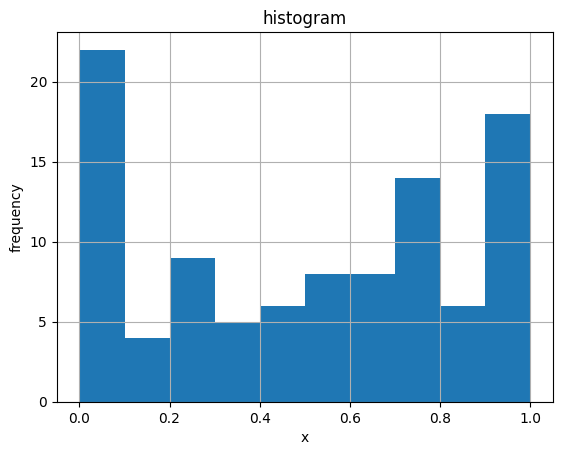

false

In [95]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram")

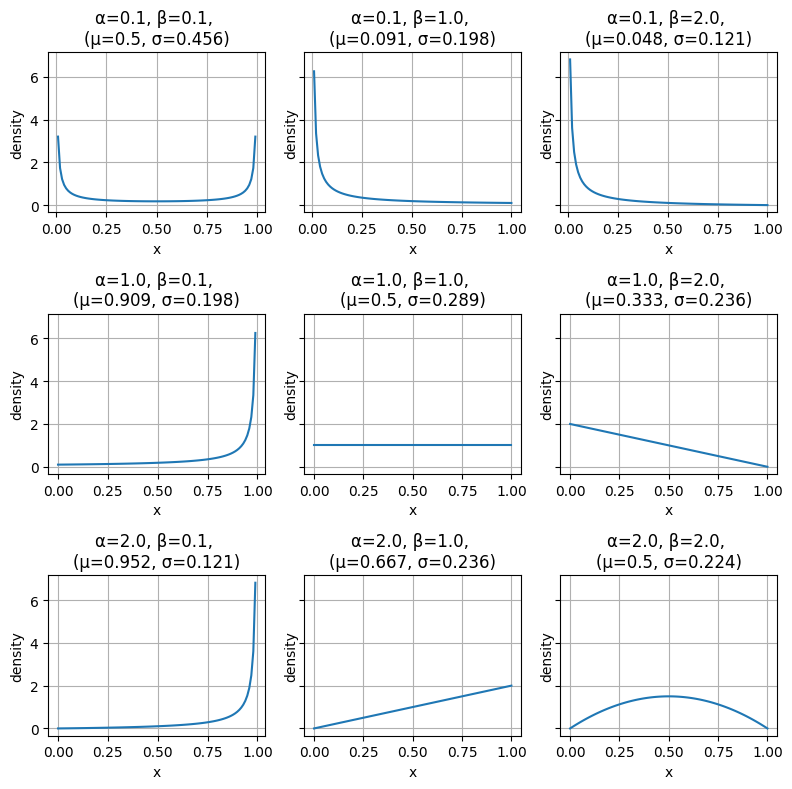

In [ ]:
xs = range(0, 1, length=100)

# パラメータのリスト
αs = [0.1, 1.0, 2.0]
βs = [0.1, 1.0, 2.0]

fig, axes = subplots(length(αs), length(βs), sharey=true, figsize=(8, 8))
for (i, α) in enumerate(αs)
    for (j, β) in enumerate(βs)
        d = Beta(α, β)
        μ, σ = mean(d), std(d)
        axes[i, j].plot(xs, pdf.(d, xs))
        set_options(axes[i, j], "x", "density", "α=$(α), β=$(β), \n" * "(μ=$(round(μ, digits=3)), σ=$(round(σ, digits=3)))")
    end
end
tight_layout()

### ディリクレ分布

In [102]:
# ディリクレ分布の作成
α = [0.75, 0.75, 0.75]
d = Dirichlet(α)

# サンプルの生成
X = rand(d, 1000)
X

3×1000 Matrix{Float64}:
 0.164145  0.297847   0.262436  0.633926  …  0.222194  0.204312  0.473177
 0.400813  0.0341759  0.180085  0.19847      0.121088  0.281391  0.513182
 0.435042  0.667978   0.55748   0.167603     0.656718  0.514297  0.0136415

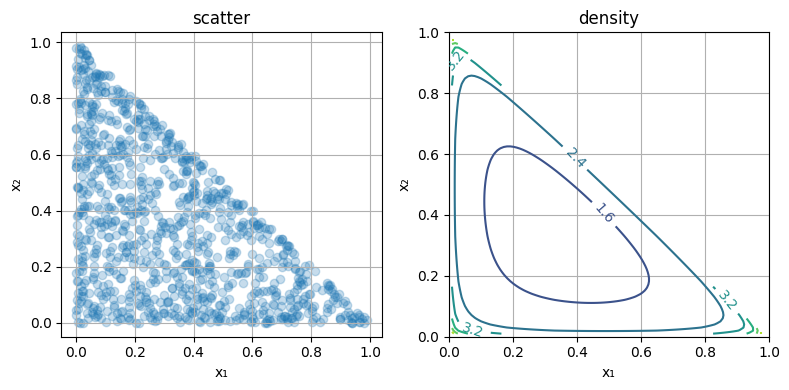

In [103]:
fig, axes = subplots(1, 2, figsize=(8, 4))

# 散布図による可視化
axes[1].scatter(X[1, :], X[2, :], alpha=0.25)
set_options(axes[1], "x₁", "x₂", "scatter")

# 確率密度関数の可視化
x₁s = range(0, 1, length=100)
x₂s = range(0, 1, length=100)
cs = axes[2].contour(x₁s, x₂s, [x₁ + x₂ > 1 ? 0 : pdf(d, [x₁, x₂, 1 - (x₁ + x₂)]) for x₁ in x₁s, x₂ in x₂s]')
axes[2].clabel(cs, inline=true)
set_options(axes[2], "x₁", "x₂", "density")
tight_layout()

In [104]:
mean(d)

3-element Vector{Float64}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333

In [105]:
cov(d)

3×3 Matrix{Float64}:
  0.0683761  -0.034188   -0.034188
 -0.034188    0.0683761  -0.034188
 -0.034188   -0.034188    0.0683761

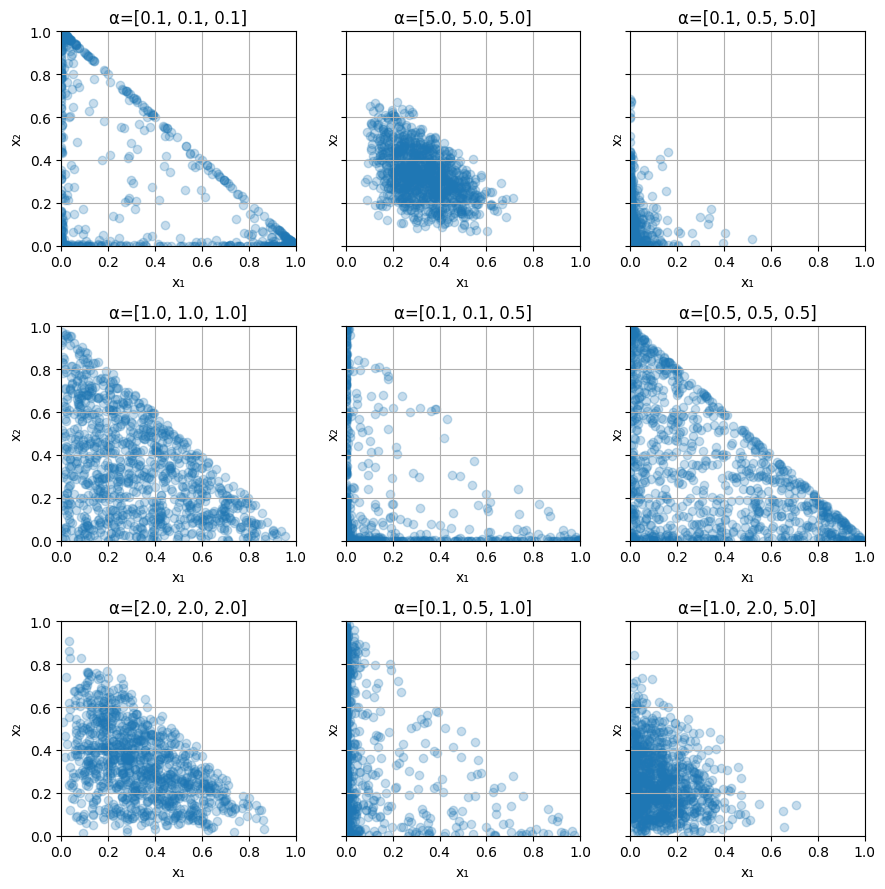

In [109]:
# パラメータのリスト
αs = [[0.1, 0.1, 0.1],
      [1.0, 1.0, 1.0],
      [2.0, 2.0, 2.0],
      [5.0, 5.0, 5.0],
      [0.1, 0.1, 0.5],
      [0.1, 0.5, 1.0],
      [0.1, 0.5, 5.0],
      [0.5, 0.5, 0.5],
      [1.0, 2.0, 5.0],
      ]

xs = range(0.1, 0.99, length=100)
ys = range(0.1, 0.99, length=100)
fig, axes = subplots(3, 3, sharey=true, figsize=(9, 9))
for (i, α) in enumerate(αs)
    d = Dirichlet(α)
    X = rand(d, 1000)
    axes[i].scatter(X[1, :], X[2, :], alpha=0.25)
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1])    
    set_options(axes[i], "x₁", "x₂", "α=$(α)")
end
tight_layout()

## 統計モデルの設定

### 対数正規分布

In [111]:
μ = 0.0
σ = 1.0
d = Normal(μ, σ)
X = rand(d, 100)
Y = exp.(X)
Y'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 7.69333  2.55295  1.30073  5.33284  …  2.23904  1.0432  4.07821  6.20489

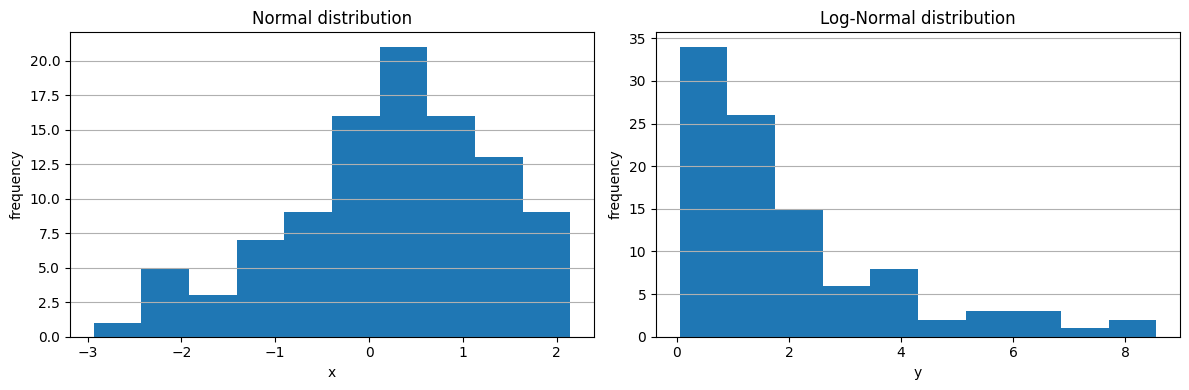

In [113]:
fig, axes = subplots(1, 2, figsize=(12, 4))
axes[1].hist(X)
set_options(axes[1], "x", "frequency", "Normal distribution"; gridy=true)
axes[2].hist(Y)
set_options(axes[2], "y", "frequency", "Log-Normal distribution"; gridy=true)
tight_layout()

In [116]:
d = LogNormal(μ, σ)
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 0.35561  0.510385  0.226475  1.00827  …  0.436179  0.564268  5.01868

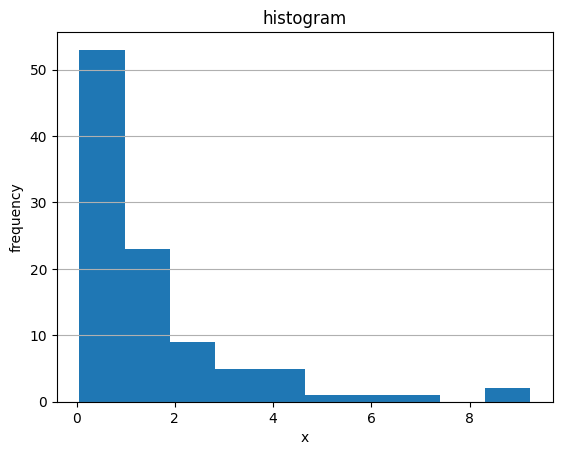

false

In [117]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram"; gridy=true)

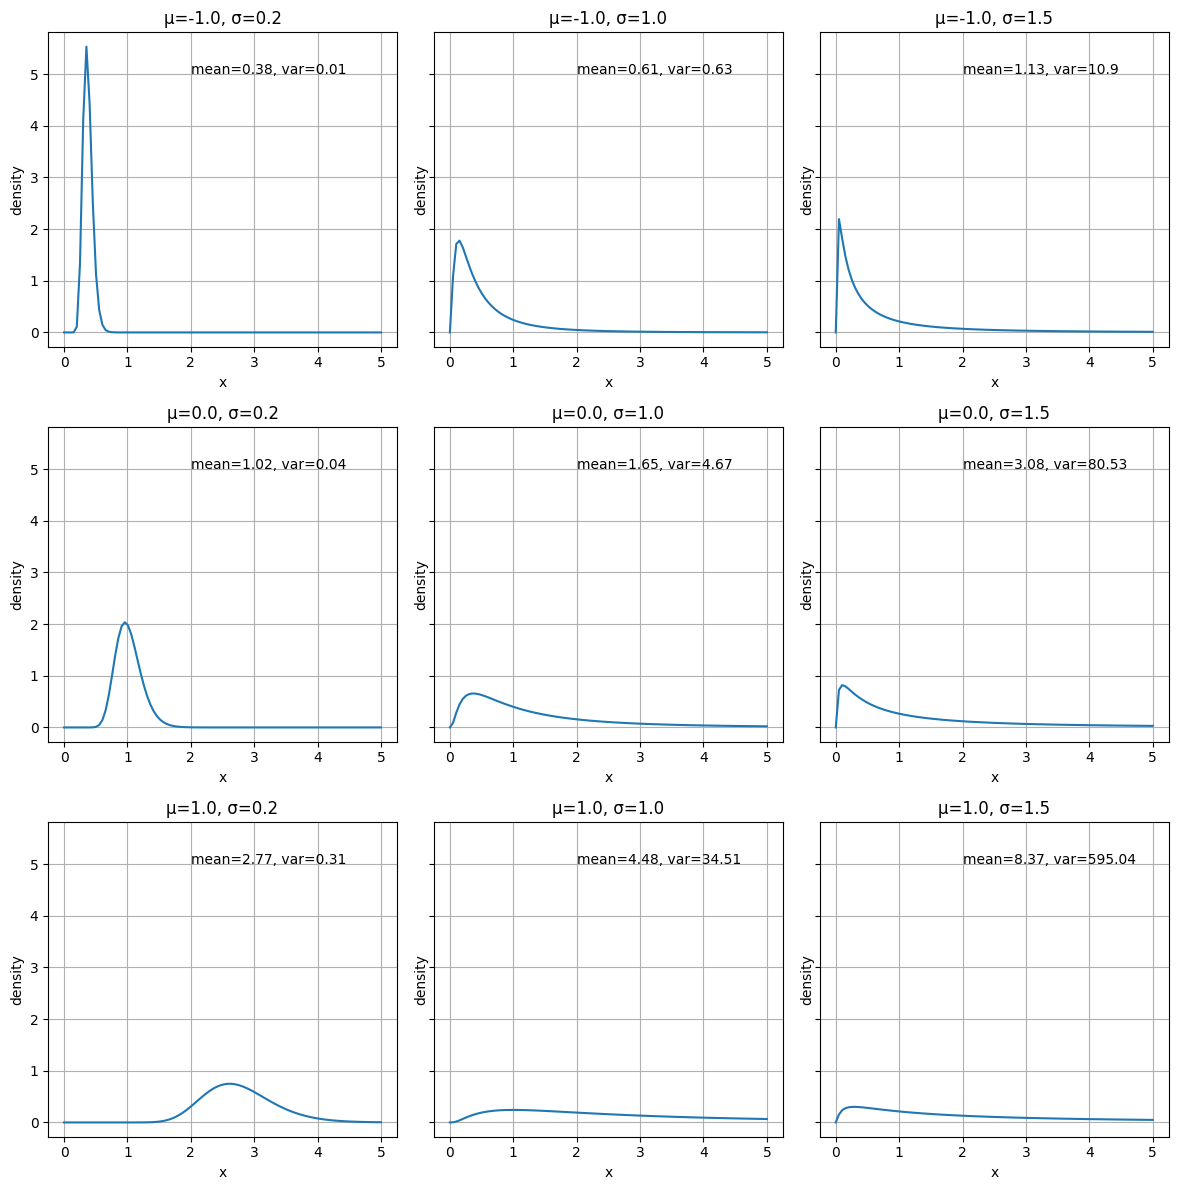

In [119]:
xs = range(0, 5, length=100)
μs = [-1.0, 0.0, 1.0]
σs = [0.2, 1.0, 1.5]
fig, axes = subplots(length(μs), length(σs), sharey=true, figsize=(12, 12))
for (i, μ) in enumerate(μs)
    for (j, σ) in enumerate(σs)
        d = LogNormal(μ, σ)
        axes[i, j].plot(xs, pdf.(d, xs))
        m = round(mean(d), digits=2)
        v = round(var(d), digits=2)
        axes[i, j].text(2, 5, "mean=$(m), var=$(v)")
        set_options(axes[i, j], "x", "density", "μ=$(μ), σ=$(σ)")
    end
end
tight_layout()

### 混合分布

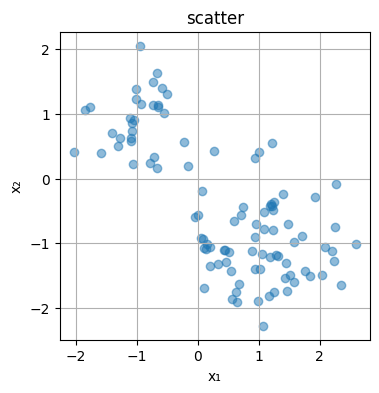

false

In [122]:
# パラメータを生成するための分布
μ₁ = [-1.0, 1.0]
Σ₁ = [0.2 0.0;
      0.0 0.2]
μ₂ = [1.0, -1.0]
Σ₂ = [0.4 0.0;
      0.0 0.4]
p = 0.3

# サンプリングする回数
N = 100

# 生成データを保存する配列
X = Array{Float64}(undef, 2, N)

# 選択された分布を示す配列（潜在変数）
S = Array{Bool}(undef, N)

for i in 1:N
    # 潜在変数のサンプル
    S[i] = rand(Bernoulli(p))
    
    # 潜在変数の値に応じて多変量正規分布のパラメータを切り替える
    (μ, Σ) = S[i] == 1 ? (μ₁, Σ₁) : (μ₂, Σ₂)
    
    # データをサンプリングする
    X[:, i] = rand(MvNormal(μ, Σ))
end

# 生成されたデータを散布図として可視化
fig, ax = subplots(1, 1, figsize=(4, 4))
ax.scatter(X[1, :], X[2, :], alpha=0.5)
set_options(ax, "x₁", "x₂", "scatter")

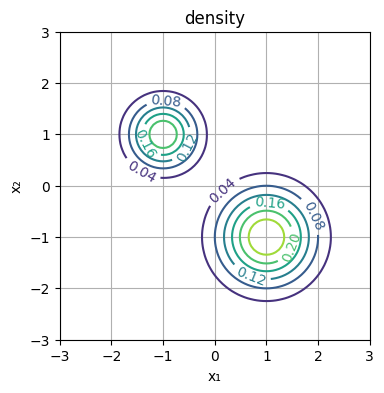

false

In [125]:
# 混合多変量正規分布の確率密度関数
pdfgmm(x) = p*pdf(MvNormal(μ₁, Σ₁), x) + (1-p)*pdf(MvNormal(μ₂, Σ₂), x)

xs₁ = range(-3, 3, length=100)
xs₂ = range(-3, 3, length=100)

fig, ax = subplots(figsize=(4, 4))
cs = ax.contour(xs₁, xs₂, [pdfgmm([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
ax.clabel(cs, inline=true)
set_options(ax, "x₁", "x₂", "density")

### 線型回帰

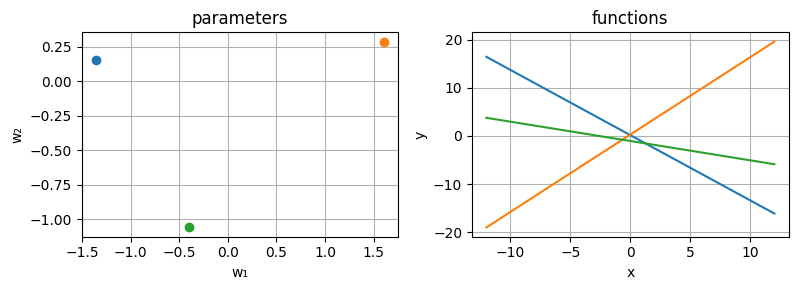

In [126]:
# パラメータを生成するための分布
μ = [0.0, 0.0]
Σ = [1.0 0.0;
     0.0 1.0]

# 出力値に付加するノイズ
σ = 1.0

# 入力値はあらかじめ与えておく
X = [-10, -5, 0, 5, 10]

# サンプリングする回数
num_samples = 3

# パラメータのサンプル
W = rand(MvNormal(μ, Σ), num_samples)

# 出力値を保存するためのリスト
Ys = []

fig, axes = subplots(1, 2, figsize=(8, 3))
xs = range(-12, 12, length=100)
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    
    # パラメータをプロット
    axes[1].scatter(w₁, w₂)
    
    # 生成された関数をプロット
    f(x) = w₁*x + w₂
    axes[2].plot(xs, f.(xs))
    
    # 関数から出力値も生成する
    Y = rand.(Normal.(f.(X), σ))
    push!(Ys, Y)
end
set_options(axes[1], "w₁", "w₂", "parameters")
set_options(axes[2], "x", "y", "functions")
tight_layout()

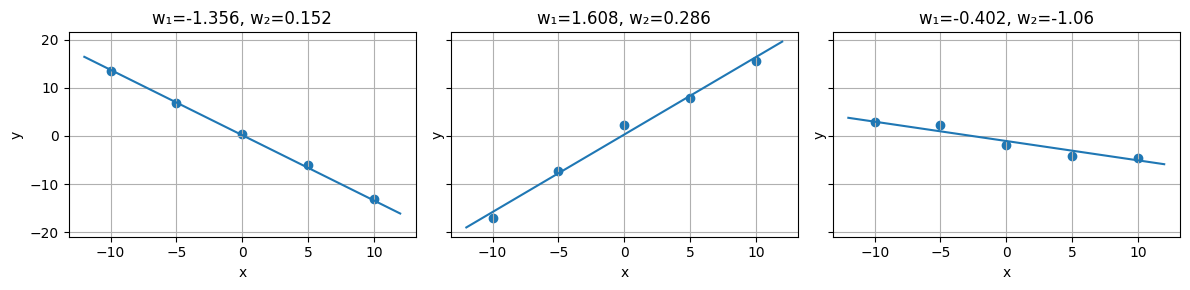

In [127]:
fig, axes = subplots(1, num_samples, sharey=true, figsize=(12, 3))
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    Y = Ys[n]
    f(x) = w₁*x + w₂
    axes[n].plot(xs, f.(xs))
    axes[n].scatter(X, Y)
    set_options(axes[n], "x", "y", "w₁=$(round(w₁, digits=3)), w₂=$(round(w₂, digits=3))")
end
tight_layout()

### 一般化線型モデル

In [128]:
sig(x) = 1 / (1 + exp(-x))

sig (generic function with 1 method)

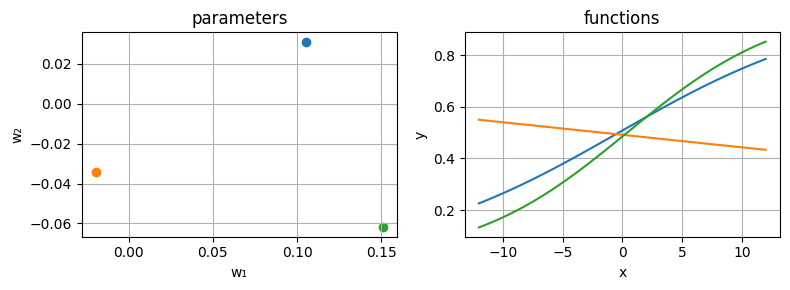

In [141]:
# パラメータを生成するための分布
μ = [0.0, 0.0]
Σ = [0.01 0.0;
     0.0 0.01]

# 入力値はあらかじめ与えておく
X = [-10, -5, 0, 5, 10]

# サンプリングする回数
num_samples = 3

# パラメータのサンプル
W = rand(MvNormal(μ, Σ), num_samples)

# 出力値を保存するためのリスト
Ys = []

fig, axes = subplots(1, 2, figsize=(8, 3))
xs = range(-12, 12, length=100)
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    
    # パラメータをプロット
    axes[1].scatter(w₁, w₂)
    
    # 生成された関数をプロット
    f(x) = sig(w₁*x + w₂)
    axes[2].plot(xs, f.(xs))
    
    # 関数からの出力値も生成する
    Y = rand.(Bernoulli.(f.(X)))
    push!(Ys, Y)
end
set_options(axes[1], "w₁", "w₂", "parameters")
set_options(axes[2], "x", "y", "functions")
tight_layout()

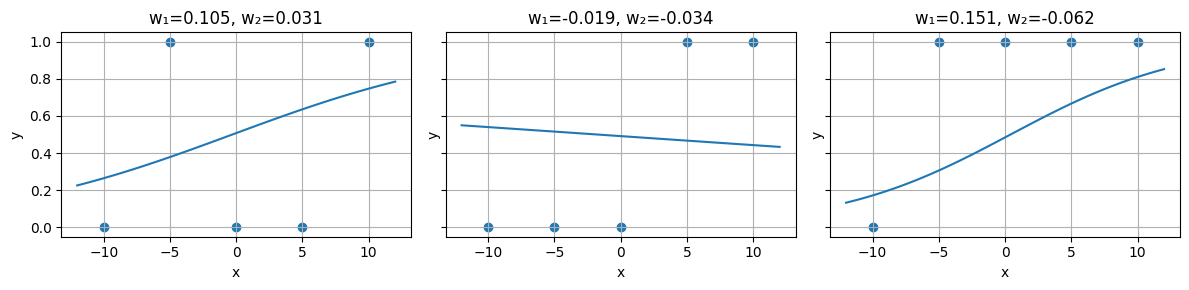

In [142]:
fig, axes = subplots(1, num_samples, sharey=true, figsize=(12, 3))
xs = range(-12, 12, length=100)
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    Y = Ys[n]
    f(x) = sig(w₁*x + w₂)
    axes[n].plot(xs, f.(xs))
    axes[n].scatter(X, Y)
    set_options(axes[n], "x", "y", "w₁=$(round(w₁, digits=3)), w₂=$(round(w₂, digits=3))")
end
tight_layout()

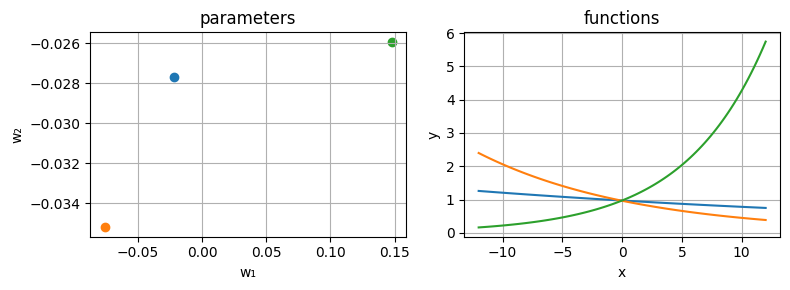

In [147]:
# パラメータを生成するための分布
μ = [0.0, 0.0]
Σ = [0.01 0.0;
     0.0 0.01]

# 入力値はあらかじめ与えておく
X = [-10, -5, 0, 5, 10]

# サンプリングする回数
num_samples = 3

# パラメータのサンプル
W = rand(MvNormal(μ, Σ), num_samples)

# 出力値を保存するためのリスト
Ys = []

fig, axes = subplots(1, 2, figsize=(8, 3))
xs = range(-12, 12, length=100)
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    
    # パラメータをプロット
    axes[1].scatter(w₁, w₂)
    
    # 生成された関数をプロット
    f(x) = exp(w₁*x + w₂)
    axes[2].plot(xs, f.(xs))
    
    # 関数からの出力値も生成する
    Y = rand.(Poisson.(f.(X)))
    push!(Ys, Y)
end
set_options(axes[1], "w₁", "w₂", "parameters")
set_options(axes[2], "x", "y", "functions")
tight_layout()

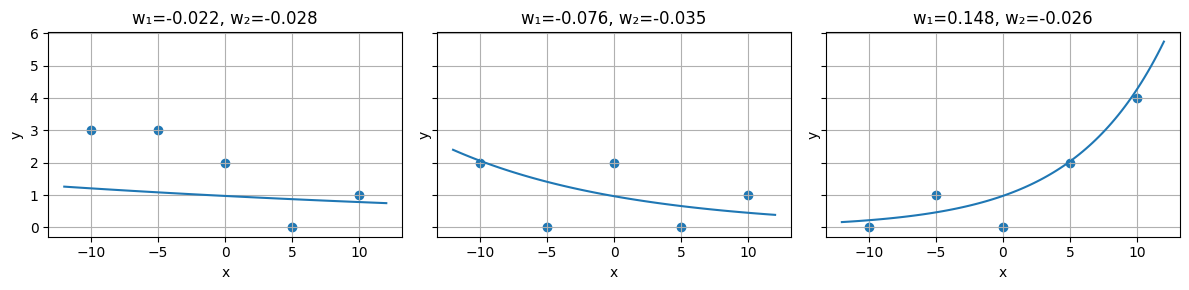

In [150]:
fig, axes = subplots(1, num_samples, sharey=true, figsize=(12, 3))
xs = range(-12, 12, length=100)
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    Y = Ys[n]
    f(x) = exp(w₁*x + w₂)
    axes[n].plot(xs, f.(xs))
    axes[n].scatter(X, Y)
    set_options(axes[n], "x", "y", "w₁=$(round(w₁, digits=3)), w₂=$(round(w₂, digits=3))")
end
tight_layout()